# Genetic Algorithm

The `genetic_algorithm` function takes the following arguments:

 `population_size`: the number of individuals in the population
 `generations`: the number of generations to run the algorithm for
 `LF` is the load factor
 `LF_lim` is the load factor limit
 `THS` is the trimmable horizontal stabilizer position
 `THS_trim` is the neutral position of the elevators
 `THS_range` is the total range of THS positions
 `V` is the airspeed
 `V_stab` is the stabilized airspeed
 `V_range` is the range of airspeed values
 `elevator_sat_time` is the elevator saturation time
 `w1` through `w3` are weighting factors assigned to each criterion.


 objective function
 - f = w1*(abs(LF-LF_lim)/LF_lim) + w2*(abs(THS-THS_trim)/THS_range) + w3*(abs(V-V_stab)/V_range) 


 minimize cost
 - cost = 1/f

In [65]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [66]:
# Define the objective function
def objective(LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range, w1, w2, w3):
    return w1*abs((LF-LF_lim)/LF_lim) + w2*abs((THS-THS_trim)/THS_range) + w3*abs((V-V_stab)/V_range) 

In [67]:
# Define the cost function
def calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range):
    costs = []
    for p in population:
        w1, w2, w3 = p
        f = objective(LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range, w1, w2, w3)
        costs.append(1/(f + 1e-10)) # Add a small constant to avoid division by zero
    return costs

In [68]:
# Define the genetic algorithm
def genetic_algorithm(population_size, generations, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range):
    # Define the initial population
    population = []
    for i in range(population_size):
        w1 = random.uniform(0, 1)
        w2 = random.uniform(0, 1)
        w3 = random.uniform(0, 1)
        population.append([w1, w2, w3])

    # Run the genetic algorithm for the defined number of generations
    for i in range(generations):
        # Evaluate the cost of the population
        costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range)

        # Select parents for crossover
        parents = []
        for j in range(population_size):
            parent1 = population[random.randint(0, population_size-1)]
            parent2 = population[random.randint(0, population_size-1)]
            if costs[population.index(parent1)] < costs[population.index(parent2)]:
                parents.append(parent1)
            else:
                parents.append(parent2)

        # Create new population through crossover and mutation
        new_population = []
        for j in range(population_size):
            parent1 = parents[random.randint(0, population_size-1)]
            parent2 = parents[random.randint(0, population_size-1)]
            child = []
            for k in range(len(parent1)):
                if random.random() < 0.5:
                    child.append(parent1[k])
                else:
                    child.append(parent2[k])
            for k in range(len(child)):
                if random.random() < 0.1:
                    child[k] = random.uniform(0, 1)
            new_population.append(child)

        # Replace the old population with the new population
        population = new_population

    # Evaluate the cost of the final population
    costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range)

    # Return the weighting factors that result in the lowest cost
    best_weights = population[costs.index(min(costs))]
    return best_weights


In [69]:
# Set the input parameters
population_size = 200
generations = 100
#LF = -1.1
LF_lim = -1.0
#THS = 0.5
THS_trim = 0.0
THS_range = 1.0
#V = 350.0
V_stab = 350.0
V_range = 100.0


In [70]:
# Call the genetic algorithm function and store the costs
costs = {}
LF_bound = np.linspace(-1.5, -0.5, 10)
THS_bound = np.linspace(-1.0, 1.0, 10)
V_bound = np.linspace(300.0, 420.0, 10)

grid = []
for i in LF_bound:
    for j in THS_bound:
        for k in V_bound:
            grid.append([i,j,k])
#print(grid)

for ele in grid:
    best_weights = genetic_algorithm(population_size, generations, ele[0] , LF_lim, ele[1], THS_trim, THS_range, ele[2], V_stab, V_range)
    #Print the best weights
    #print("Best weights: ", best_weights)
    cost = 1/objective( ele[0] , LF_lim, ele[1], THS_trim, THS_range, ele[2], V_stab, V_range, *best_weights)
    costs[cost] = ele
#print(costs)

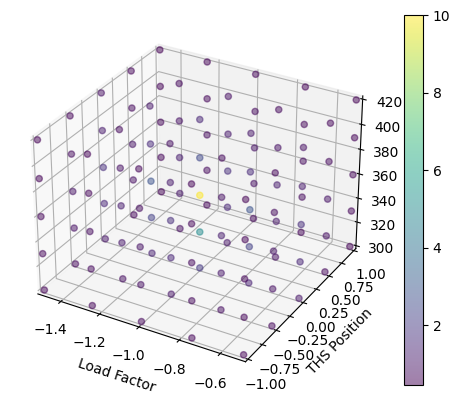

In [72]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = [c[0] for c in costs.values()]
y = [c[1] for c in costs.values()]
z = [c[2] for c in costs.values()]
c = list(costs.keys())
sc = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)
ax.set_xlabel('Load Factor')
ax.set_ylabel('THS Position')
ax.set_zlabel('Airspeed')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(300.0, 420.0)
fig.colorbar(sc)
plt.show()